In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('us_stock_historical_data.csv')

In [2]:
df.drop('Volume', axis = 1, inplace = True)    # irrelevant column
df.rename(columns = {'Close/Last' : 'Close'}, inplace = True)

df.set_index('Date', inplace = True)
df.index = pd.to_datetime(df.index)

In [3]:
# Daily Maximum and Minimum values are the same as the 'High' and 'Low' for the day
df['Daily High'] = df['High']
df['Daily Low'] = df['Low']

In [4]:
df['Weekly High'] = df[['High']].resample('W-mon', closed = 'left').max().resample('d').ffill()
df['Weekly Low'] = df[['Low']].resample('W-mon', closed = 'left').min().resample('d').ffill()

In [5]:
df['Monthly High'] = df[['High']].resample('M', closed = 'left').max().resample('d').ffill()
df['Monthly Low'] = df[['Low']].resample('M', closed = 'left').min().resample('d').ffill()

In [6]:
df['Quarterly High'] = df[['High']].resample('Q', closed = 'left').max().resample('d').ffill()
df['Quarterly Low'] = df[['Low']].resample('Q', closed = 'left').min().resample('d').ffill()

In [7]:
df[200:240]    # form check

,Close,Open,High,Low,Daily High,Daily Low,Weekly High,Weekly Low,Monthly High,Monthly Low,Quarterly High,Quarterly Low
Date,,,,,,,,,,,,
2021-10-19,158.2812,159.1875,159.7812,158.0625,159.7812,158.0625,160.3438,157.0938,164.750,158.6875,167.1250,158.6875
2021-10-18,159.5625,159.4062,159.7188,158.6562,159.7188,158.6562,160.3438,157.0938,164.750,158.6875,167.1250,158.6875
2021-10-15,159.3750,160.2188,160.2500,159.0938,160.2500,159.0938,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-14,160.0938,159.8438,160.3438,159.1875,160.3438,159.1875,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-13,159.6562,158.6562,159.9375,158.4375,159.9375,158.4375,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-12,158.5625,157.5000,158.9375,157.4062,158.9375,157.4062,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-11,157.4688,157.5938,157.7188,157.0938,157.7188,157.0938,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-08,157.7500,158.3750,158.6562,157.5000,158.6562,157.5000,161.2500,158.6875,164.750,158.6875,167.1250,158.6875
2021-10-07,158.4375,159.4375,159.7500,158.3125,159.7500,158.3125,161.2500,158.6875,164.750,158.6875,167.1250,158.6875


In [8]:
df.to_csv('us_stock_price_indicators_statistics.csv')
df.to_excel('us_stock_price_indicators_statistics.xlsx', sheet_name = 'Stock Price Statistics Data')

In [9]:
def query_for_a_day(on = False):
    # get datas for a day
    if on:
        print("Press enter to exit from the query!\nAvailable date range: [2017.08.08 ; 2022.08.05]\n")
        while True:
            year = input("Year: ")
            if year == "":
                break
            month = input("Month: ")
            if month == "":
                break
            day = input("Day: ")
            if day == "":
                break
            try:
                year, month, day = int(year), int(month), int(day)
            except ValueError:
                print("Invalid input!\n")
                continue
            query_idx = f"{year}-{month}-{day}"
            try:
                print(df.loc[query_idx])
            except KeyError:
                print("No data found on this day.")
            print()

In [10]:
query_for_a_day(on = True)

Press enter to exit from the query!
Available date range: [2017.08.08 ; 2022.08.05]

Year: 2019
Month: 05
Day: 27
No data found on this day.

Year: 2022
Month: 05.
Day: 27
Invalid input!

Year: 2020
Month: 05
Day: 27
Close             179.4688
Open              178.9062
High              179.9062
Low               178.1562
Daily High        179.9062
Daily Low         178.1562
Weekly High       181.1250
Weekly Low        177.8125
Monthly High      183.0625
Monthly Low       177.4375
Quarterly High    191.6875
Quarterly Low     155.1562
Name: 2020-05-27 00:00:00, dtype: float64

Year: 


In [11]:
# plotting
x1 = df.index
y1 = df['Weekly High']
y2 = df['Quarterly High']

x2 = df.index[df.index.year == 2021]
y3 = df['Daily High'][df.index.year == 2021]
y4 = df['Daily Low'][df.index.year == 2021]

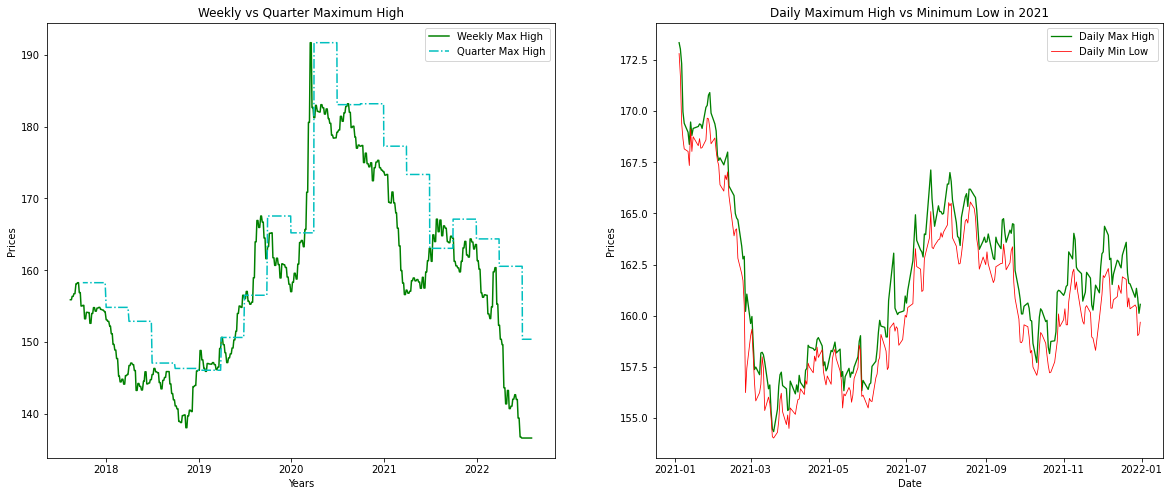

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
ax[0].plot(x1, y1, color = 'g', label = 'Weekly Max High')
ax[0].plot(x1, y2, color = 'c', label = 'Quarter Max High', linestyle = '-.')

ax[0].set_xlabel('Years')
ax[0].set_ylabel('Prices')
ax[0].set_title('Weekly vs Quarter Maximum High')
ax[0].legend()


ax[1].plot(x2, y3, color = 'g', label = 'Daily Max High', linewidth = 1.3)
ax[1].plot(x2, y4, color = 'r', label = 'Daily Min Low', linewidth = 0.8)

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Prices')
ax[1].set_title('Daily Maximum High vs Minimum Low in 2021')
ax[1].legend()

plt.show()